In [18]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from tqdm import tqdm
from torchvision import datasets
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE, Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [4]:
train_set=datasets.MNIST('data', train=True, download=True)
test_set=datasets.MNIST('data', train=False, download=True)
X_train = train_set.data.numpy().reshape(-1,28*28).astype('float32')/255.0
X_test = test_set.data.numpy().reshape(-1,28*28).astype('float32')/255.0
y_train = train_set.targets.numpy().astype('int32')
y_test = test_set.targets.numpy().astype('int32')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)
print(np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test))

(60000, 784) (10000, 784) (60000,) (10000,)
float32 float32 int32 int32
0.0 1.0 0.0 1.0


# sample

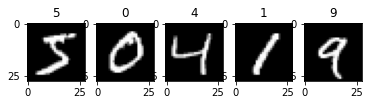

In [5]:
for i in range(5):
    plt.subplot(151+i)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.xticks([0,25])
    plt.yticks([0,25])
    plt.title(y_train[i])

# test

In [ ]:
svc = make_pipeline(StandardScaler(), SVC())
svc.fit(X_train,y_train)
result=svc.predict(X_test)
print('Accuracy :',accuracy_score(y_test,result))
print(classification_report(y_test,result))

Accuracy : 0.9661
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# find best hyperparameter

In [1]:
c_list=[0.01,0.05,0.1,0.2,0.5,1,10]

In [5]:
kernel = 'linear'
granularity = 0.1
accuracy_list=[]
for c in tqdm(c_list):
    try:
        svc = make_pipeline(StandardScaler(),SVC(C=c, kernel=kernel))
        svc.fit(X_train, y_train)
        result = svc.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, result))
    except:
        print('Error: ', kernel, c)
        accuracy_list.append(0)
plt.plot(c_list,accuracy_list,label=kernel)
plt.legend()
plt.show()

 86%|████████▌ | 6/7 [55:17<14:27, 867.17s/it]

In [ ]:
kernel = 'rbf'
granularity = 0.1
accuracy_list=[]
for c in tqdm(c_list):
    try:
        svc = make_pipeline(StandardScaler(),SVC(C=c, kernel=kernel))
        svc.fit(X_train, y_train)
        result = svc.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, result))
    except:
        print('Error: ', kernel, c)
        accuracy_list.append(0)
plt.plot(c_list,accuracy_list,label=kernel)
plt.legend()
plt.show()

In [ ]:
kernel='sigmoid'
granularity = 0.1
accuracy_list=[]
for c in tqdm(c_list):
    try:
        svc = make_pipeline(StandardScaler(),SVC(C=c, kernel=kernel))
        svc.fit(X_train, y_train)
        result = svc.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, result))
    except:
        print('Error: ', kernel, c)
        accuracy_list.append(0)
plt.plot(c_list,accuracy_list,label=kernel)
plt.legend()
plt.show()

100%|██████████| 7/7 [2:42:14<00:00, 1390.60s/it]  


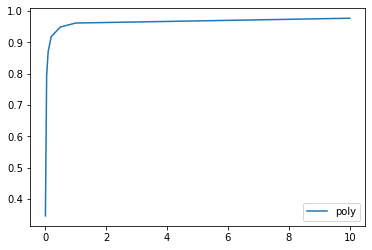

In [7]:
kernel='poly'
granularity = 0.1
accuracy_list=[]
for c in tqdm(c_list):
    try:
        svc = make_pipeline(StandardScaler(),SVC(C=c, kernel=kernel))
        svc.fit(X_train, y_train)
        result = svc.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, result))
    except:
        print('Error: ', kernel, c)
        accuracy_list.append(0)
plt.plot(c_list,accuracy_list,label=kernel)
plt.legend()
plt.show()